In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
zom_ds = pd.read_csv(r'C:\Users\Admin\Zomatodataset\zomato.csv', encoding='latin-1')

In [3]:
print(zom_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
zom_ds.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
numerical_feature = [feature for feature in zom_ds.columns if zom_ds[feature].dtypes != 'O']
categorical_feature = [feature for feature in zom_ds.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 8
Categorical feature Count 13


So far we have uploaded a part of the dataset of of 2 where we see a lot of datapoint wrt zomato hotels countrie and its cuisines. we see that there are 13 categorical and 8 numerical coulmns. 

In [6]:
zom_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [7]:
zom_ds.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
for i in categorical_feature:
    zom_ds[i] = zom_ds[i].str.strip()

In [9]:
zom_ds.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

checked the null values after removing the whitespaces, also checked the columns and its dtypes

In [10]:
missing_values=zom_ds["Cuisines"].isnull()
mv=zom_ds[missing_values]
mv

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [11]:
zom_ds['Cuisines'].fillna(method='ffill', inplace=True)

In [12]:
zom_ds.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

understanding the null values and filled it with forward fill to ensure that the rates can be normal per the area /state and country

In [13]:
 zom_ds.columns=zom_ds.columns.str.lower()
zom_ds.columns

Index(['restaurant id', 'restaurant name', 'country code', 'city', 'address',
       'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'switch to order menu',
       'price range', 'aggregate rating', 'rating color', 'rating text',
       'votes'],
      dtype='object')

In [14]:
 zom_ds.rename(columns={'restaurant id':"restaurant_id",'restaurant name':"restaurant_name",'country code':'country_code','locality verbose':'local_ver',
                       'average cost for two':'avg_2','has table booking':'booked_tables','has online delivery':'onlinedelivery_available',
                        'is delivering now':'actively_delivering','aggregate rating':'aggr_rate','price range':'price_range',
                       "rating color":'rate_color','rating text':'rate_text'},inplace=True)

lowered the names and renamed it for better use

In [15]:
zom_ds

,restaurant_id,restaurant_name,country_code,city,address,locality,local_ver,longitude,latitude,cuisines,...,currency,booked_tables,onlinedelivery_available,actively_delivering,switch to order menu,price_range,aggr_rate,rate_color,rate_text,votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


loading the other part of the sheet to merge it along with the initial sheet

In [16]:
con_cd=pd.read_excel(r"C:\Users\Admin\Zomatodataset\Country-Code.xlsx")

In [17]:
con_cd.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


lowering the case and renaming it to standardize the entire table

In [18]:
con_cd.columns=con_cd.columns.str.lower()

In [19]:
con_cd.rename(columns={'country code':"country_code"},inplace= True)

In [20]:
con_cd.info

<bound method DataFrame.info of     country_code         country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States>

In [21]:
con_cd.isnull().sum()

country_code    0
country         0
dtype: int64

# merging both the files :- country code & Zomato

In [22]:
zom=pd.merge(zom_ds,con_cd, on="country_code",how="left")

In [23]:
zom.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,local_ver,longitude,latitude,cuisines,...,booked_tables,onlinedelivery_available,actively_delivering,switch to order menu,price_range,aggr_rate,rate_color,rate_text,votes,country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [24]:
zom.dtypes

restaurant_id                 int64
restaurant_name              object
country_code                  int64
city                         object
address                      object
locality                     object
local_ver                    object
longitude                   float64
latitude                    float64
cuisines                     object
avg_2                         int64
currency                     object
booked_tables                object
onlinedelivery_available     object
actively_delivering          object
switch to order menu         object
price_range                   int64
aggr_rate                   float64
rate_color                   object
rate_text                    object
votes                         int64
country                      object
dtype: object

In [25]:
numerical_feature = [feature for feature in zom.columns if zom[feature].dtypes != 'O']
categorical_feature = [feature for feature in zom.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 8
Categorical feature Count 14


In [26]:
for i in zom:
    print(zom[i].value_counts())
    print("\n")

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: restaurant_id, Length: 9551, dtype: int64


Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: restaurant_name, Length: 7446, dtype: int64


1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: country_code, dtype: int64


New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan    

checked the numerical, categorical columns and the datain each column and its repeatation and uniqueness

# exploring the total countries in the dataset

In [27]:
zom.country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: country, dtype: int64

# ploting graphs

In [28]:
country_name=zom.country.value_counts().index

In [29]:
country_val=zom.country.value_counts().values

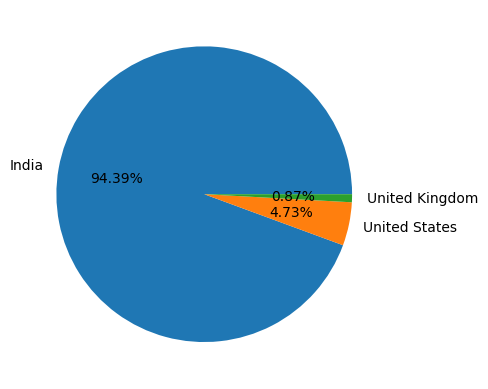

In [30]:
plt.pie(country_val[:3],labels=country_name[:3],autopct="%1.2f%%");

we see India is using the apps to larger extent where as it seems other countries only uses it to browse the location. It is followed by US, UK.

# working on the rating to categorize it in a range

In [31]:
zom.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'local_ver', 'longitude', 'latitude', 'cuisines', 'avg_2',
       'currency', 'booked_tables', 'onlinedelivery_available',
       'actively_delivering', 'switch to order menu', 'price_range',
       'aggr_rate', 'rate_color', 'rate_text', 'votes', 'country'],
      dtype='object')

In [32]:
rating=zom.groupby(["aggr_rate","rate_color", "rate_text"]).size().reset_index().rename(columns={0:"rating_count"})

In [33]:
rating["rate_color"].nunique()

6

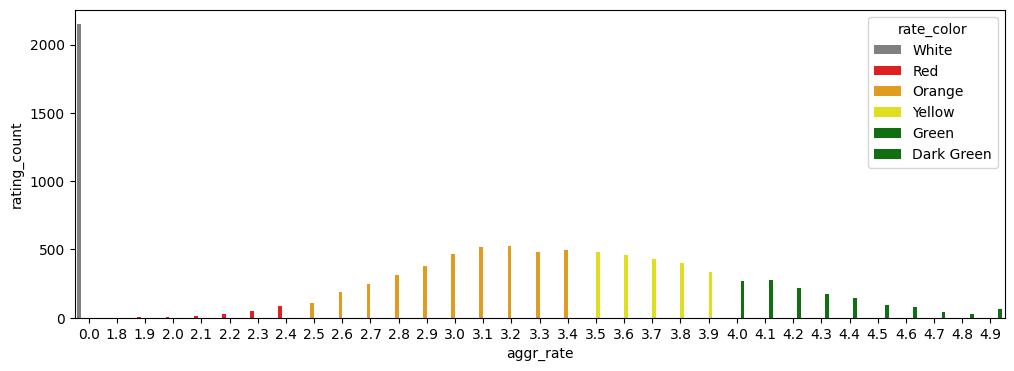

In [34]:
plt.rcParams["figure.figsize"]=(12,4)
sns.barplot(x="aggr_rate",y="rating_count",data=rating,hue="rate_color",palette=["Grey","Red","Orange","Yellow","Green","Green"]);

we see majorty of the customers have not givin any rating with majority rating their experiences in the range of 2.9 to 3.9

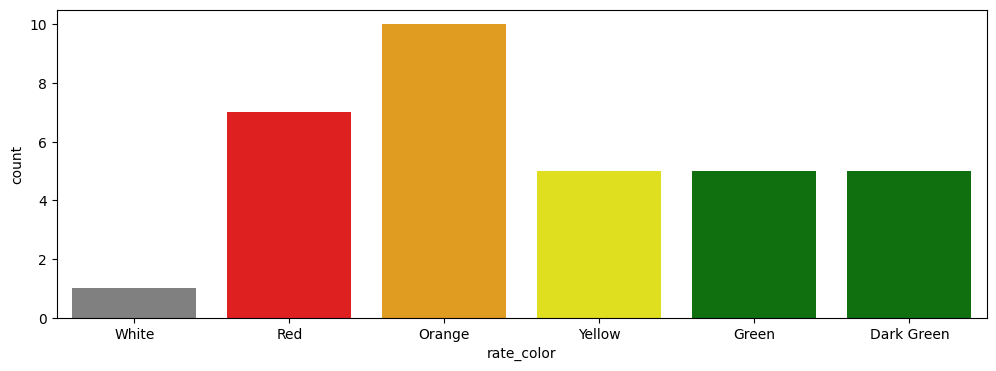

In [142]:
sns.countplot(x="rate_color",data=rating,palette=["Grey","Red","Orange","Yellow","Green","Green"]);

In [36]:
zom[zom["rate_color"]=="White"].groupby("country").size()

country
Brazil               5
India             2139
United Kingdom       1
United States        3
dtype: int64

checked the numbers for the customers who never gave any rating

create a pie chart of cities dist

In [37]:
city_name=zom.city.value_counts().index
city_val=zom.city.value_counts().values

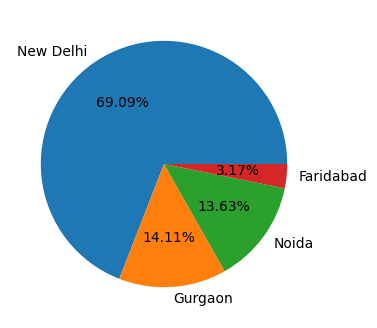

In [38]:
plt.pie(city_val[:4],labels=city_name[:4],autopct="%1.2f%%");

It is seen that Delhi has used this service most in india compared to other cities like Gurgaon and Noida 

In [39]:
cuisines_name=zom.cuisines.value_counts().index
cuisines_val=zom.cuisines.value_counts().values

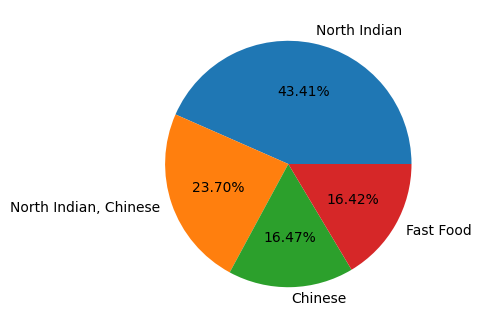

In [40]:
plt.pie(cuisines_val[:4],labels=cuisines_name[:4],autopct="%1.2f%%");

It is seen that North Indian, Chiniese and Fast food is most relished food by the customers who ordered the most

In [41]:
zom['price_range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: price_range, dtype: int64

In [42]:
zom.avg_2.value_counts().sort_index(ascending=False)

800000      2
500000      1
450000      1
350000      1
300000      2
         ... 
20         25
15          4
10        128
7           4
0          18
Name: avg_2, Length: 140, dtype: int64

There seems to be a huge difference in the prices, probably because of (3*-5*-7*) we do not see a specific category in regard to the restaurent minimum billing. or it could be because of currency difference.

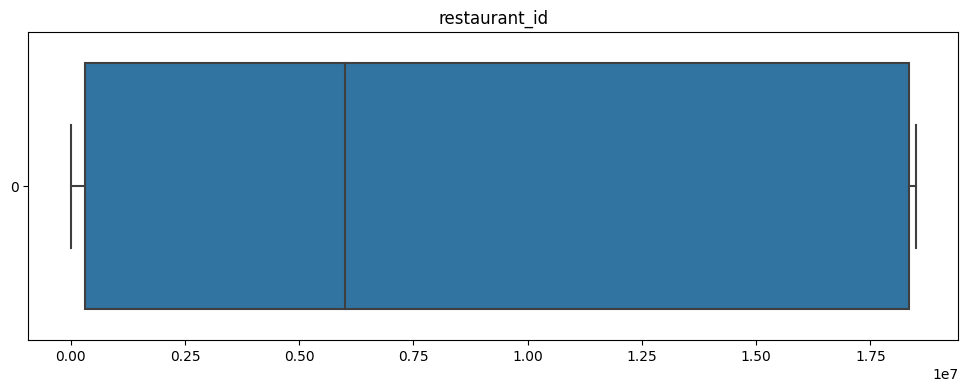

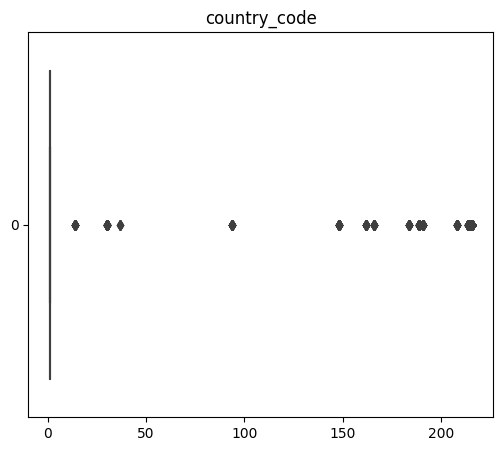

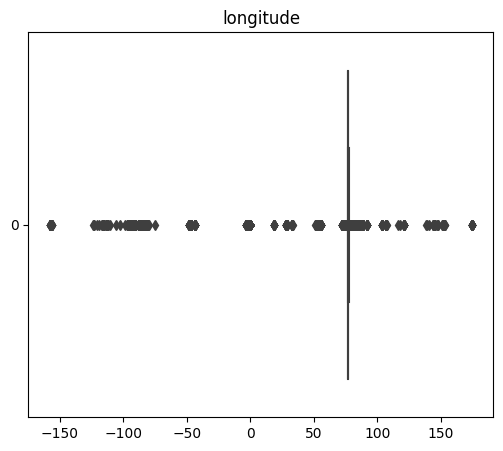

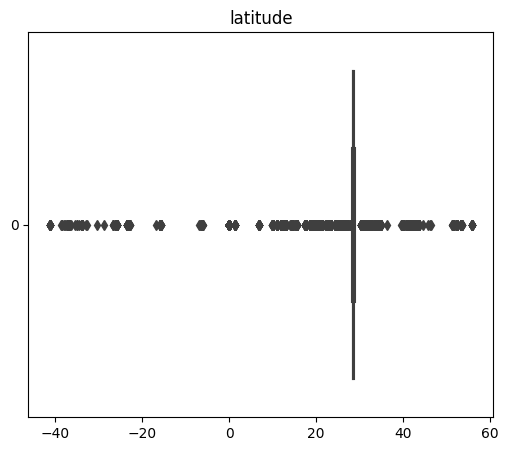

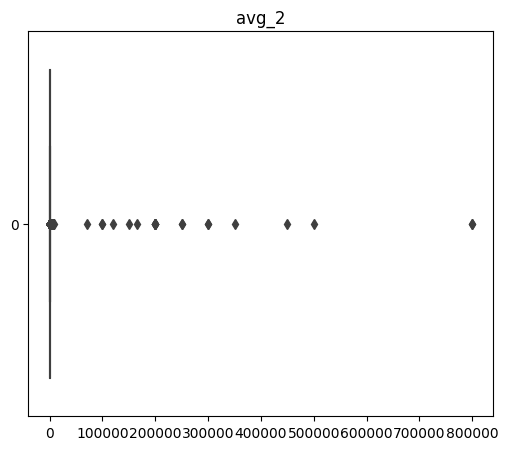

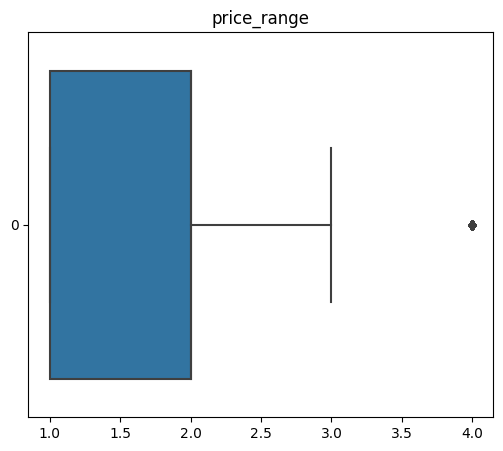

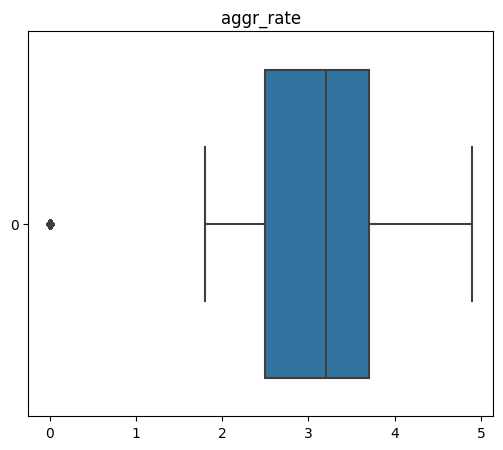

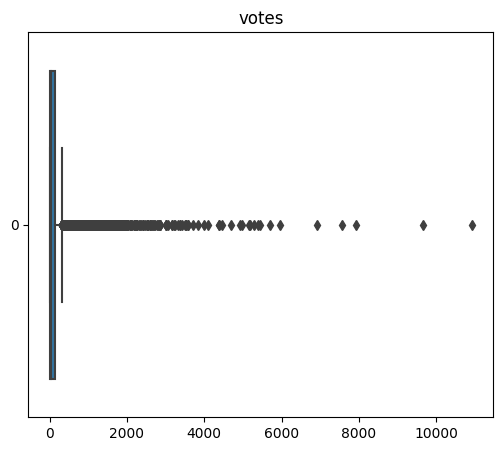

<Figure size 600x500 with 0 Axes>

In [43]:
for i in numerical_feature:
    sns.boxplot(zom[i],orient="h")
    plt.title(i)
    plt.figure(figsize=(6,5));

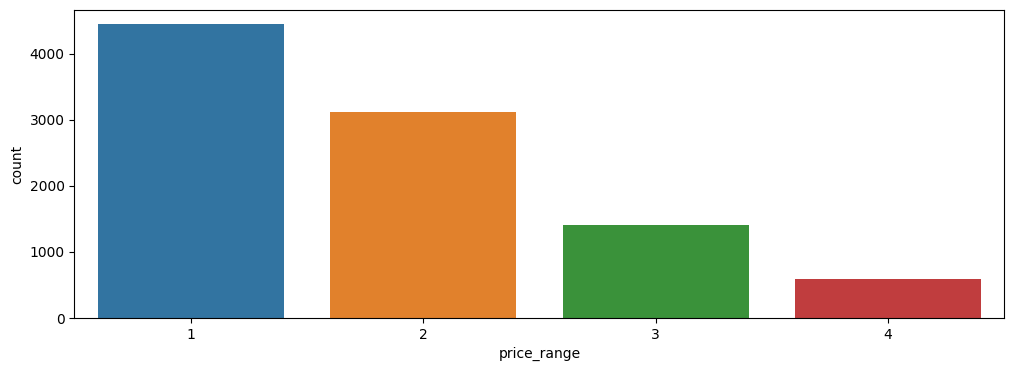

In [44]:
sns.countplot(x= zom["price_range"]);

predicting price range can be solved by classification models

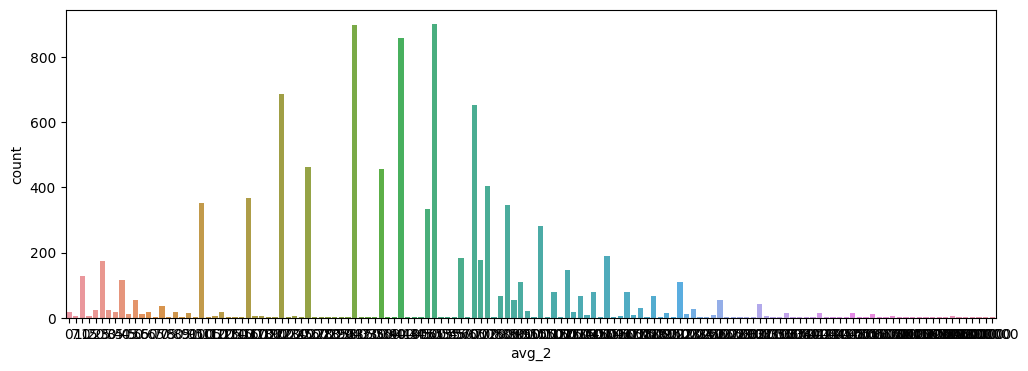

In [45]:
sns.countplot(x= zom["avg_2"]);

predicting average for 2 people can be solved by linear models

In [46]:
zom.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'local_ver', 'longitude', 'latitude', 'cuisines', 'avg_2',
       'currency', 'booked_tables', 'onlinedelivery_available',
       'actively_delivering', 'switch to order menu', 'price_range',
       'aggr_rate', 'rate_color', 'rate_text', 'votes', 'country'],
      dtype='object')

In [47]:
columsdrop=['address','local_ver','longitude','latitude','switch to order menu','country','locality']
zom.drop(columns=columsdrop,inplace=True)

In [48]:
zom

,restaurant_id,restaurant_name,country_code,city,cuisines,avg_2,currency,booked_tables,onlinedelivery_available,actively_delivering,price_range,aggr_rate,rate_color,rate_text,votes
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901


In [49]:
numerical_feature = [feature for feature in zom.columns if zom[feature].dtypes != 'O']
categorical_feature = [feature for feature in zom.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 6
Categorical feature Count 9


working on skewness and outliers

In [50]:
from scipy.stats import zscore

In [51]:
#creating a function to choose right threshold
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [52]:
z=np.abs(zscore(zom[numerical_feature]))
threhold(z,zom[numerical_feature])

With threshold 3.0 data loss is 8.99%
With threshold 3.2 data loss is 7.96%
With threshold 3.4 data loss is 7.45%
With threshold 3.6 data loss is 1.49%
With threshold 3.8 data loss is 1.38%
With threshold 4.0 data loss is 1.23%
With threshold 4.2 data loss is 1.12%
With threshold 4.4 data loss is 1.04%
With threshold 4.6 data loss is 0.98%
With threshold 4.8 data loss is 0.94%


In [53]:
df=zom[(z<4.8).all(axis=1)]

In [54]:
print ("Shape of the dataframe before removing outliers: ",zom.shape)
print ("Shape of the dataframe after removing outliers: ", df.shape)
print ("Percentage of data loss post outlier removal: ", (zom.shape[0]-df.shape[0])/zom.shape[0]*100)

Shape of the dataframe before removing outliers:  (9551, 15)
Shape of the dataframe after removing outliers:  (9461, 15)
Percentage of data loss post outlier removal:  0.9423097057899695


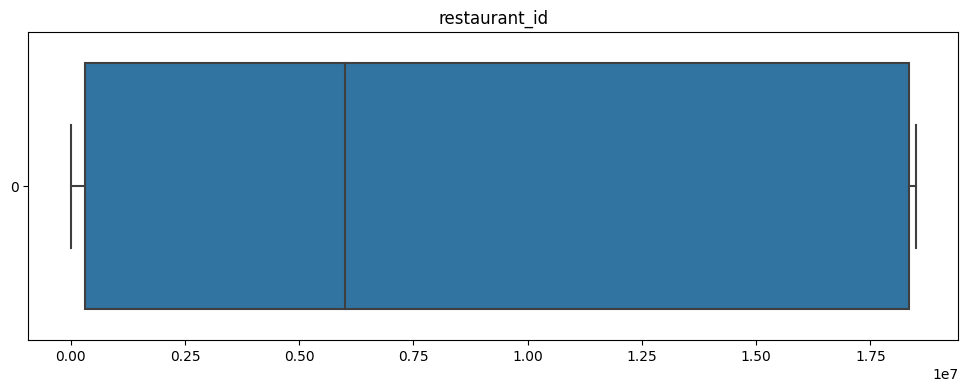

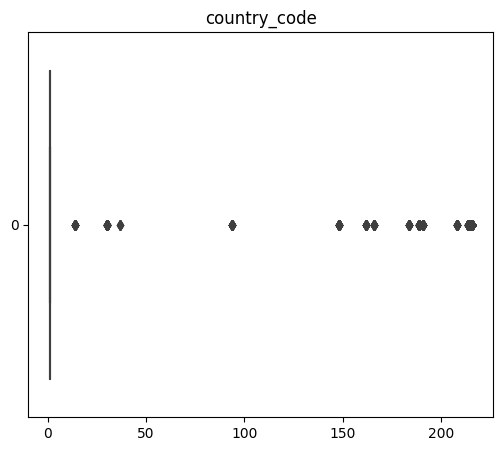

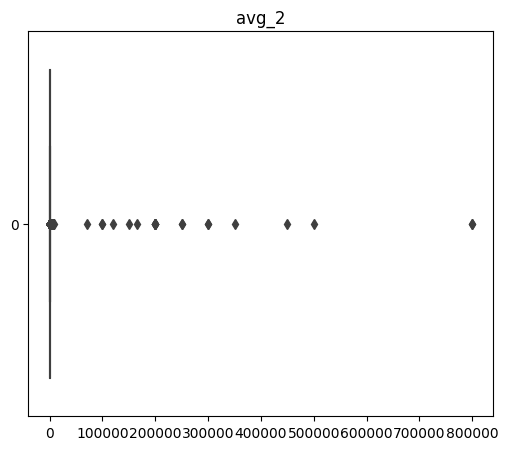

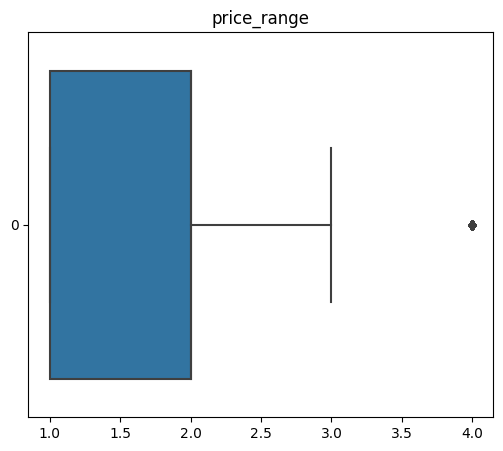

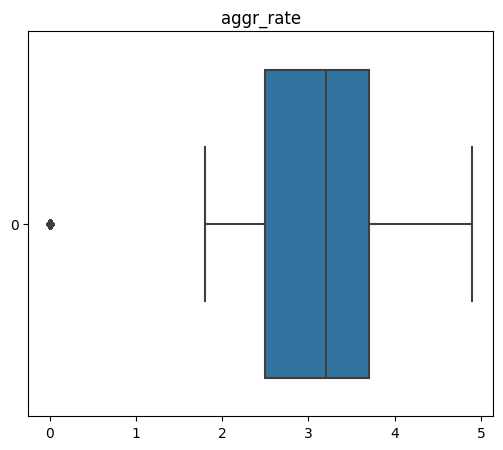

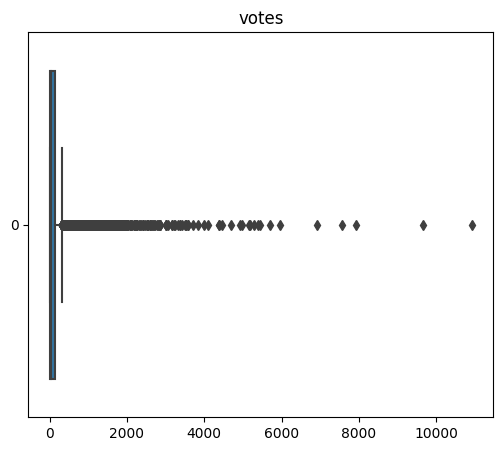

<Figure size 600x500 with 0 Axes>

In [55]:
for i in numerical_feature:
    sns.boxplot(zom[i],orient="h")
    plt.title(i)
    plt.figure(figsize=(6,5));

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()

In [58]:
categorical_feature

['restaurant_name',
 'city',
 'cuisines',
 'currency',
 'booked_tables',
 'onlinedelivery_available',
 'actively_delivering',
 'rate_color',
 'rate_text']

In [59]:
for i in categorical_feature:
    zom[i]=le.fit_transform(zom[i])

In [60]:
zom

,restaurant_id,restaurant_name,country_code,city,cuisines,avg_2,currency,booked_tables,onlinedelivery_available,actively_delivering,price_range,aggr_rate,rate_color,rate_text,votes
0,6317637,3748,162,73,920,1100,0,1,0,0,3,4.8,0,1,314
1,6304287,3172,162,73,1111,1200,0,1,0,0,3,4.5,0,1,591
2,6300002,2896,162,75,1671,4000,0,1,0,0,4,4.4,1,5,270
3,6318506,4707,162,75,1126,1500,0,0,0,0,4,4.9,0,1,365
4,6314302,5523,162,75,1122,1500,0,1,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,1813,80,11,0,0,0,3,4.1,1,5,788
9547,5908749,1310,208,140,1824,105,11,0,0,0,3,4.2,1,5,1034
9548,5915807,3068,208,140,1110,170,11,0,0,0,4,3.7,5,2,661
9549,5916112,512,208,140,1657,120,11,0,0,0,4,4.0,1,5,901


In [61]:
zom.skew()

restaurant_id                0.061570
restaurant_name              0.044636
country_code                 3.043965
city                        -1.193777
cuisines                    -0.304876
avg_2                       35.477915
currency                     2.858093
booked_tables                2.321100
onlinedelivery_available     1.114620
actively_delivering         16.673412
price_range                  0.889618
aggr_rate                   -0.954130
rate_color                   0.046009
rate_text                    0.431408
votes                        8.807637
dtype: float64

In [62]:
zom=zom.drop(['actively_delivering'],axis=1)

In [63]:
zom.skew()

restaurant_id                0.061570
restaurant_name              0.044636
country_code                 3.043965
city                        -1.193777
cuisines                    -0.304876
avg_2                       35.477915
currency                     2.858093
booked_tables                2.321100
onlinedelivery_available     1.114620
price_range                  0.889618
aggr_rate                   -0.954130
rate_color                   0.046009
rate_text                    0.431408
votes                        8.807637
dtype: float64

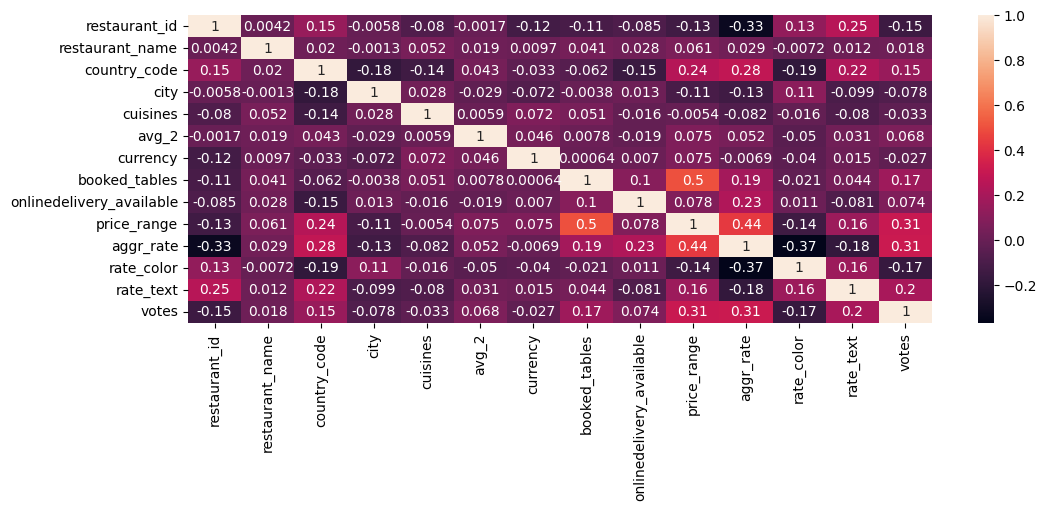

In [64]:
 sns.heatmap(zom.corr(),annot=True);

Training Classification model 1st
==================================

In [65]:
 import sklearn
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix,accuracy_score, roc_auc_score, recall_score, precision_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import datetime
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [66]:
zom['price_range']=le.fit_transform(zom['price_range'])

In [67]:
X = zom.drop(columns=['price_range'])
y = zom['price_range']
y

0       2
1       2
2       3
3       3
4       3
       ..
9546    2
9547    2
9548    3
9549    3
9550    1
Name: price_range, Length: 9551, dtype: int64

In [68]:
sc=StandardScaler()
x=sc.fit_transform(X)

In [69]:
x_train,x_test,y_train,y_test =train_test_split(X,y, test_size=0.30, random_state=42)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6685, 13)
(2866, 13)
(6685,)
(2866,)


In [71]:
models={'LogisticRegression':LogisticRegression(),
         'DecisionClassifier':DecisionTreeClassifier(),
         'RandomForestClassifer':RandomForestClassifier(),
        'AdaBoostClassifier':AdaBoostClassifier(),
         'GradientBoostingClassifier':GradientBoostingClassifier(),
         'XGBClassifier':xgb.XGBClassifier(),
       'QuadraticDiscriminantAnalysis':QuadraticDiscriminantAnalysis(),
         'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=10)}

In [72]:
name=[]
Acc=[]
for model in models.values(): 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model)
    name.append(model)
    print("\tAccuracy Score:", accuracy_score(y_test, y_pred))
    Acc.append(accuracy_score(y_test, y_pred))
    score = cross_val_score(model,x_train, y_train)
    print(score)
    print(score.mean())
    print("Difference btw accurancy and CV score is  ",accuracy_score(y_test, y_pred) - score.mean())
    print("\tClassification Report:", classification_report(y_test, y_pred))
    print()

LogisticRegression()
	Accuracy Score: 0.5390788555478018
[0.61854899 0.49065071 0.48466717 0.60359013 0.5632012 ]
0.5521316379955123
Difference btw accurancy and CV score is   -0.013052782447710576
	Classification Report:               precision    recall  f1-score   support

           0       0.62      0.92      0.74      1333
           1       0.51      0.06      0.11       937
           2       0.34      0.64      0.44       405
           3       0.00      0.00      0.00       191

    accuracy                           0.54      2866
   macro avg       0.37      0.41      0.32      2866
weighted avg       0.50      0.54      0.44      2866


DecisionTreeClassifier()
	Accuracy Score: 0.9675505931612003
[0.97008227 0.98279731 0.97980553 0.95961107 0.97756171]
0.9739715781600597
Difference btw accurancy and CV score is   -0.006420984998859458
	Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1333
       

So far we see that DecisionTreeClassifier, GradientBoostingClassifier, XGBClassifier are giving very good results will tune the models for better results and finalizing

Hyperparameter tunning
--

GradientBoostingClassifier

In [73]:
gbc=GradientBoostingClassifier()

In [74]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
        'criterion':['friedman_mse', 'squared_error'],
        'loss':['log_loss', 'exponential'],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [75]:
a=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10,n_jobs=-2)
a.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-2,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [76]:
print(a.best_estimator_)
print(a.best_params_)
print(a.best_score_)

GradientBoostingClassifier(max_depth=6, subsample=1)
{'subsample': 1, 'n_estimators': 100, 'max_depth': 6, 'loss': 'log_loss', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
0.9866858211827466


In [77]:
gbc=GradientBoostingClassifier(subsample= 1, n_estimators= 100,max_depth= 6,loss= 'log_loss',learning_rate= 0.1,criterion= 'friedman_mse')
gbc.fit(x_train,y_train)
p1=gbc.predict(x_test)

In [78]:
score=cross_val_score(gbc,x,y,cv=10,n_jobs=-4)

In [79]:
print(score.mean())

0.9073655501763456


In [80]:
print(accuracy_score(y_test, p1))
print(confusion_matrix(y_test, p1))

0.9825540823447313
[[1330    3    0    0]
 [   5  923    9    0]
 [   0   11  389    5]
 [   0    0   17  174]]


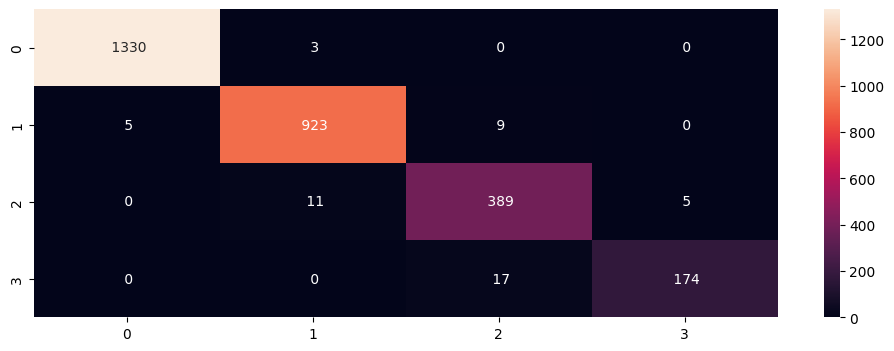

In [81]:
sns.heatmap(confusion_matrix(y_test, p1),annot=True,fmt=' ');

XGBClassifier

In [82]:
params={'colsample_bytree':[0.6,0.2,0.8], 'gamma':[4.1,2.5,6.8],
        'max_depth':[2,30,45], 'min_child_weight':[0.1,0.001,1.0,1.8],
        'reg_alpha': [57.0,20,15,65,95], 'reg_lambda': [0.8,1.6,2.4,3.2,4.5]}

In [83]:
b=RandomizedSearchCV(xgb.XGBClassifier(),params,cv=10,n_jobs=-2,error_score='raise')
b.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-2,
                   param_distributions={'colsample_bytree': [0.6, 0.2, 0.8],
                                        'gamma': [4.1, 2.5, 6.8],
                                        'max_depth': [2, 30, 45],
                                        'min_child_weight': [0.1, 0.001, 1.0,
                                                             1.8],
                                        'reg_alpha': [57.0, 20, 15, 65, 95],
                                        'reg_lambda': [0.8, 1.6, 2.4, 3.2,
                                                       4.5]})

In [84]:
print(b.best_estimator_)
print(b.best_params_)
print(b.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=45, max_leaves=None,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
{'reg_lambda': 2.4, 'reg_alpha': 15, 'min_child_weight': 1.0, 'max_depth': 45, 'gamma': 4.1, 'colsample_bytree': 0.6}
0.9573666568208873


In [145]:
xgb=xgb.XGBRFClassifier(reg_lambda= 2.4, reg_alpha= 15, min_child_weight= 1.0, max_depth= 45, gamma= 4.1, colsample_bytree= 0.6)
xgb.fit(x_train,y_train)
p2=xgb.predict(x_test)

In [146]:
score1=cross_val_score(xgb,x,y,cv=10,n_jobs=-2)

In [147]:
print(score1.mean())

0.9084235142062257


In [148]:
print(accuracy_score(y_test, p2))
print(confusion_matrix(y_test, p2))

0.9466154919748779
[[1330    3    0    0]
 [  20  897   18    2]
 [   3   38  358    6]
 [   9    3   51  128]]


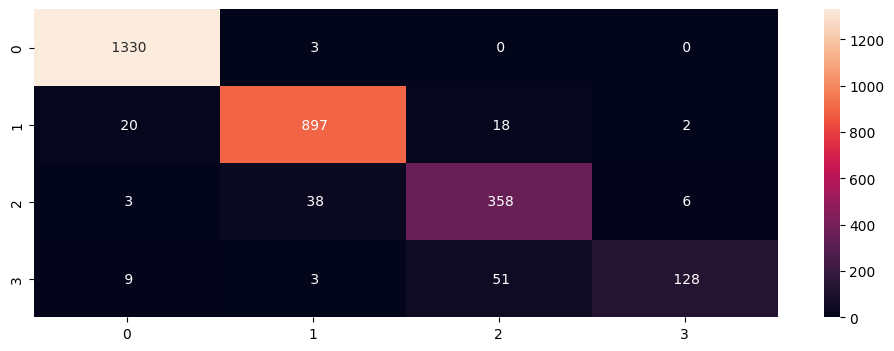

In [149]:
sns.heatmap(confusion_matrix(y_test, p2),annot=True,fmt=' ');

DecisionTreeClassifier

In [90]:
dt=DecisionTreeClassifier()

In [91]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [92]:
params ={'ccp_alpha': [0.0,0.2,0.4,0.6],
 'class_weight':[None, 'balanced', {0: 1, 1: 2}],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [None,10,20,30],
 'max_features': [None,'sqrt','log2'],
 'max_leaf_nodes': [None,10,20,30],
 'min_impurity_decrease': [0.0,0.1,0.8],
 'min_samples_leaf': [2,5,3,7],
 'min_samples_split': [0.5,0.8,4,2],
 'min_weight_fraction_leaf': [0.0,0.5,0.3],
 'random_state': [None,10,50,100,150],
 'splitter': ['best','random']}

In [93]:
c=RandomizedSearchCV(DecisionTreeClassifier(),params,cv=10,n_jobs=-2,error_score='raise')
c.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=DecisionTreeClassifier(), n_jobs=-2,
                   param_distributions={'ccp_alpha': [0.0, 0.2, 0.4, 0.6],
                                        'class_weight': [None, 'balanced',
                                                         {0: 1, 1: 2}],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 30],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.8],
                                        'min_samples_leaf': [2, 5, 3, 7],
                                        'min_samples_split': [0.5, 0.8, 4, 2],
                                        'min_weight_fraction_leaf': [0.0, 0.5,
                                                                     0.3],
                                        'random_state': [None, 10, 50, 100,
                                                         150],
                                        'splitter': ['best', 'random']})

In [94]:
print(c.best_estimator_)
print(c.best_params_)
print(c.best_score_)

DecisionTreeClassifier(ccp_alpha=0.6, criterion='entropy', max_depth=20,
                       max_features='sqrt', max_leaf_nodes=30,
                       min_impurity_decrease=0.8, min_samples_leaf=7,
                       min_samples_split=0.5, min_weight_fraction_leaf=0.5,
                       random_state=100)
{'splitter': 'best', 'random_state': 100, 'min_weight_fraction_leaf': 0.5, 'min_samples_split': 0.5, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.8, 'max_leaf_nodes': 30, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None, 'ccp_alpha': 0.6}
0.4653706040833132


In [151]:
dt=DecisionTreeClassifier(splitter= 'best', random_state=100, min_weight_fraction_leaf= 0.5, min_samples_split= 0.5, min_samples_leaf= 7, min_impurity_decrease=0.8,max_leaf_nodes=30, max_features= 'sqrt',max_depth= 20, criterion='entropy', class_weight=None, ccp_alpha= 0.6)
dt.fit(x_train,y_train)
p3=dt.predict(x_test)

In [152]:
score2=cross_val_score(dt,x,y,cv=10,n_jobs=-2)

In [153]:
print(score2.mean())

0.46529157265219395


In [154]:
print(accuracy_score(y_test, p3))
print(confusion_matrix(y_test, p3))

0.46510816468946264
[[1333    0    0    0]
 [ 937    0    0    0]
 [ 405    0    0    0]
 [ 191    0    0    0]]


after tunning we see that Gradient boost is giving very good results. as the output is multi class unable to plot auc/roc hence will save the model and work on regression part.

In [99]:
import joblib
joblib.dump(gbc,'zom_price_range.pkl')

['zom_price_range.pkl']

Regression Model
---

In [157]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

In [101]:
zom1=zom

In [102]:
zom1

,restaurant_id,restaurant_name,country_code,city,cuisines,avg_2,currency,booked_tables,onlinedelivery_available,price_range,aggr_rate,rate_color,rate_text,votes
0,6317637,3748,162,73,920,1100,0,1,0,2,4.8,0,1,314
1,6304287,3172,162,73,1111,1200,0,1,0,2,4.5,0,1,591
2,6300002,2896,162,75,1671,4000,0,1,0,3,4.4,1,5,270
3,6318506,4707,162,75,1126,1500,0,0,0,3,4.9,0,1,365
4,6314302,5523,162,75,1122,1500,0,1,0,3,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,1813,80,11,0,0,2,4.1,1,5,788
9547,5908749,1310,208,140,1824,105,11,0,0,2,4.2,1,5,1034
9548,5915807,3068,208,140,1110,170,11,0,0,3,3.7,5,2,661
9549,5916112,512,208,140,1657,120,11,0,0,3,4.0,1,5,901


In [103]:
X1=zom1.drop(['avg_2'],axis=1)

In [104]:
X1

,restaurant_id,restaurant_name,country_code,city,cuisines,currency,booked_tables,onlinedelivery_available,price_range,aggr_rate,rate_color,rate_text,votes
0,6317637,3748,162,73,920,0,1,0,2,4.8,0,1,314
1,6304287,3172,162,73,1111,0,1,0,2,4.5,0,1,591
2,6300002,2896,162,75,1671,0,1,0,3,4.4,1,5,270
3,6318506,4707,162,75,1126,0,0,0,3,4.9,0,1,365
4,6314302,5523,162,75,1122,0,1,0,3,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,1813,11,0,0,2,4.1,1,5,788
9547,5908749,1310,208,140,1824,11,0,0,2,4.2,1,5,1034
9548,5915807,3068,208,140,1110,11,0,0,3,3.7,5,2,661
9549,5916112,512,208,140,1657,11,0,0,3,4.0,1,5,901


In [105]:
y1=zom1['avg_2']
y1

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: avg_2, Length: 9551, dtype: int64

In [171]:
sc=StandardScaler()
x1=sc.fit_transform(X1)

In [172]:
xtrain,xtest,ytrain,ytest =train_test_split(x1,y1, test_size=0.30, random_state=42)

In [173]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6685, 13)
(2866, 13)
(6685,)
(2866,)


In [174]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    AdaBoostRegressor(),
    xgb.XGBRegressor(),
    Lasso(),
    Ridge()
]

In [175]:
head = 12
for model in regressors[:head]:
    start = time()
    model.fit(xtrain, ytrain)
    train_time = time() - start
    start = time()
    ypred = model.predict(xtest)
    predict_time = time()-start
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(ytest, ypred))
    print("\tMean absolute error:", mean_absolute_error(ytest, ypred))
    print("\tR2 score:", r2_score(ytest, ypred))
    print()

KNeighborsRegressor()
	Training time: 0.010s
	Prediction time: 0.183s
	Explained variance: 0.17961053485984635
	Mean absolute error: 677.8616887648291
	R2 score: 0.17938238562848496

GradientBoostingRegressor()
	Training time: 0.982s
	Prediction time: 0.002s
	Explained variance: 0.31618983345316076
	Mean absolute error: 618.7701020799086
	R2 score: 0.31618891544845895

KNeighborsRegressor()
	Training time: 0.009s
	Prediction time: 0.183s
	Explained variance: 0.17961053485984635
	Mean absolute error: 677.8616887648291
	R2 score: 0.17938238562848496

ExtraTreesRegressor()
	Training time: 1.241s
	Prediction time: 0.053s
	Explained variance: 0.43055709089712
	Mean absolute error: 522.3124877878578
	R2 score: 0.4305521875737216

RandomForestRegressor()
	Training time: 3.342s
	Prediction time: 0.043s
	Explained variance: 0.421080436515473
	Mean absolute error: 582.3028681088625
	R2 score: 0.4210471256233844

DecisionTreeRegressor()
	Training time: 0.033s
	Prediction time: 0.001s
	Explained v

XGB is the only model somewhat considerable results on basis of good R2 and minimal MAE will tune it before finalizing.



Hyperparameter
=======

XGBregressor

In [176]:
param={'max_depth': [3, 18, 1],
        'gamma': [1,9],
        'reg_alpha' : [40,180,1],
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' :  [0, 10, 1],
        'n_estimators': [180,100,80],
        'seed': [0,10,100]
    }

In [192]:
d=RandomizedSearchCV(xgb.XGBRegressor(),param,cv=10,n_jobs=-2,error_score='raise')
d.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-2,
                   param_distributions={'colsample_bytree': [0.5, 1],
                                        'gamma': [1, 9],
                                        'max_depth': [3, 18, 1],
                                        'min_child_weight': [0, 10, 1],
                                        'n_estimators': [180, 100, 80],
                                        'reg_alpha': [40, 180, 1],
                                        'reg_lambda': [0, 1],
                                        'seed': [0, 10, 100]})

In [193]:
print(d.best_estimator_)
print(d.best_params_)
print(d.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=18,
             max_leaves=None, min_child_weight=0, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=80,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)
{'seed': 0, 'reg_lambda': 0, 'reg_alpha': 40, 'n_estimators': 80, 'min_child_weight': 0, 'max_depth': 18, 'gamma': 1, 'colsample_bytree': 1}
0.4928617951833082


In [194]:
xg=xgb.XGBRegressor(seed= 0,reg_lambda= 0,reg_alpha= 180,n_estimators=180, min_child_weight= 0,max_depth=1,gamma= 9,colsample_bytree= 1)
xg.fit(xtrain,ytrain)
p4=xg.predict(xtest)

In [195]:
score4=cross_val_score(xg,X1,y1,cv=10,n_jobs=-2)

In [196]:
print("R2 score:", r2_score(ytest, p4))
print("Mean absolute error:", mean_absolute_error(ytest, p4))

R2 score: 0.5063122351837416
Mean absolute error: 780.4309496882905


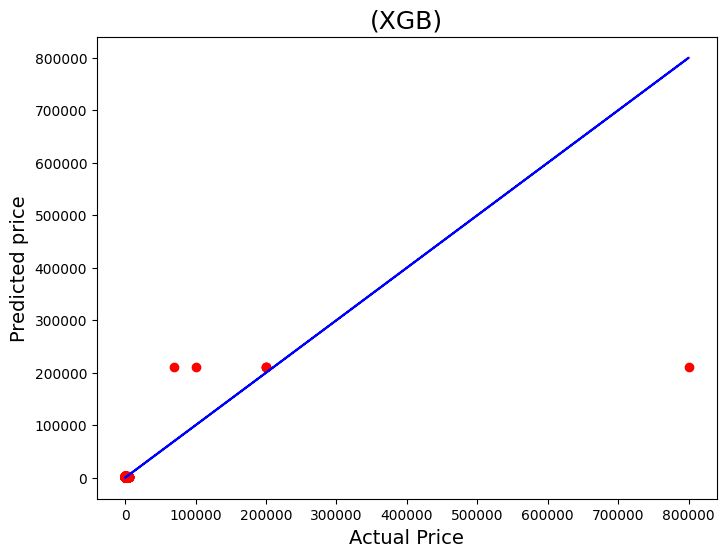

In [197]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest,y=p4,color='r')
plt.plot(ytest,ytest,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted price',fontsize=14)
plt.title('(XGB)',fontsize=18);

In [198]:
import joblib
joblib.dump(xg,'zom_avgfor_2.pkl')

['zom_avgfor_2.pkl']